# Ridge Regresyon

* Amaç hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır.
* öle katsayılar bulmalıyız ki hata mse, rmse değerleri mininmum olsun
* çoklu doğrusal regresyondan farklı olarak katsayılara ceza uyguluyacağız.
* Regularization Makine öğrenmesi modelinin varyansını düşürmek için kullanılan bir methotdur. 
* Regularization bir modelin toplam hata kareler değerini minimum yapabilmek için ceza değerinin ceza katsayısı olarak adlandırılan bir alpha değeri ile çarpılması ve modelin hata değeri ile toplanması işlemidir.
* Genel olarak, önemli ölçüde büyük katsayılara sahip girdiler, tüm değişkenler benzer aralıklarda değerler aldığında model tahminlerini yönlendirme eğilimindedir.Önemli değişken gürültülüyse veya model verilere fazla uyuyorsa bu bir sorun haline gelir çünkü bu, model tahminlerinin ya gürültüden ya da değişken'deki önemsiz değişikliklerden kaynaklanmasına neden olur.

* Çoklu doğrusal regresyon
$SSE(hata kareler toplamı)= \sum_{i=1}^{n}(y_{i} - {\hat{y}_{i}})^{2}$

* Ridge regresyon
$SSE_{L_{2}}= \sum_{i=1}^{n}(y_{i} - {\hat{y}_{i}})^{2} + \lambda \sum_{j=1}^{P}\beta _{j}^{^{2}}$

* $\lambda$ : ayar parametresi, yani kullanıcı tarafından verilen ve ayarlanan parametre

* $\sum_{j=1}^{P}\beta _{j}^{^{2}}$ : ceza terimi

* $_{L_{2}}$ : Düzenlileştirme (Regularization) Normu

* aşırı öğrenmeye karşı dirençlidir

* yanlıdır fakat varyans düşüktür (bazen yanlı modelleri daha çok tercih ederiz)
* çok fazla parametre olduğunda EKK'ya göre  yani klasik regresyona göre daha iyidir
* Değişken sayısı gözlem sayısından fazla olduğu (çok boyutluluk laneti p >n) durumlara karşı çözüm sunar 
* çoklu doğrusal bağlantı problemi olduğunda etkilidir. Yani bağımsız değişkenler arasında yüksek korelasyon olması demektir. Bir değişkenin taşıdığı bilgiyi neredeyse aynısını başka değişen de taşıyor. bu bir problemdiri korelasyon değerine bakılır.iki bağımsız değişken arasındaki korelasyon değeri %90 ise büyük ihtimalle bu iki bağımsız değişken arasında çoklu doğrusal bağlantı problemi olacağını gösterir
* Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır 
**$\lambda$**
* $\lambda$ kritik roldeddir. iki terimin (formüldeki) göreceli etkilerini kontrol etmeyi sağlar.Optimize edilmesi gerekn parametresidir.
* $\lambda$ için iyi bir değer bulunması önemlidir. Bunun için CV (cross validation) yöntemi kullanılır. 
* $\lambda$'nın sıfır olduğu yer EKK(yani klasik regresyon)'dır. HKT(hata kareler toplamı-SSE) yi minimum yapan $\lambda$'yı arıyoruz
* $\lambda$ için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır
* En küçük cross validation'ı veren $\lambda$ ayar parametresi olarak seçilir
* son olarak seçilen bu $\lambda$ ile model yeniden tüm gözlemlere fit edilir
* KAtsaılara uygulana şiddetin belirlenmesi bizim elimizde bu $\lambda$  değeridir
* Düzenlileştirme, bir Makine Öğrenimi modelinin varyansını azaltmak için kullanılan bir yöntemdir; başka bir deyişle, overfittingi azaltmak için kullanılır.
* ridge regresyondaki katsayıları bizim belirlediiğimiz bir ceza değeri ile çarparak sıfır yapmamak fakat sıfıra yaklaştırma amacındayız. 
* tüm katsayıları modelde tutup, bu katsayıların modele olan etkilerini ayarlıyoruz
* öle bir ceza değeri uyguluyoruz ki katsayılar benzer etkilerini önemlerine göre kaybetmiş oluyor
* seçilecek olan lambdaya göre değişkenlerin görece etkilerini ayarlıyabilmiş oluyoruz, ama diyoruz ki bunlar modelde kalsın sıfıra yaklaşsın ama modelden komple çıkarmayalım demiş oluyoruz

* SCALE işlemi
* değişkenlerin ölçü birimlerinin katsayılar üzerindeki etkisini ortadan kaldırmak için değişkenleri ölçekleriz.
* ridge model içerisinde normalization =True yapılarak scale işlemi gerçekleştirilebilir, fakat bu ilerde kaldırılacağı için bunun yerine model pipeline oluşturularak StandartScale ile birleştirilebilir ya d a aşağıdaki gibi önce standart scale sonrada model kurulabilir.

* X test ve train versii Ridge modele koyulmadan önce değişkenlerin benzer arlıkta değer alması için normalleştirme (scale) işlemine tabi tutulması önerilir.
* Test ve doğrulama seti, eğitim setinden öğrenilen ortalama ve standart sapmaya dayalı olarak standardize edilmelidir.
* sklearn.preprocessing.StandardScaler() girdileri standartlaştırmak için kullanılabilir. fit() fonksiyonunun çağrılması, eğitim setinin ortalamasını ve standart sapmasını hesaplar. Ardından, aynı fit() nesnesi eğitim, doğrulama ve test setlerini dönüştürmek için kullanılır.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler,scale

from sklearn.linear_model import Ridge, RidgeCV

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
hit = pd.read_csv("./dataset/hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League", "Division", "NewLeague", "Salary"], axis = 1)
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

---------------

### Model

In [3]:
ridge_model = Ridge().fit(X_train,y_train)

In [4]:
ridge_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [5]:
ridge_model.coef_

array([ -1.7833362 ,   8.82281559,   7.26631498,  -3.33050119,
        -2.07091307,   5.42111154,   7.50977607,  -0.13557983,
        -0.21962511,  -0.63033482,   1.7974231 ,   0.73919181,
        -0.68443562,   0.26159973,   0.26762087,  -0.48054311,
       102.20055186, -97.88649765, -38.9216579 ])

### lambdalar için döngü 

#### numpy.linespace
numpy.linspace(start, stop, num = 50, endpoint = True,retstep = False,dtype = None)

**Parameters :**
-> start  : [optional] start of interval range. By default start = 0
-> stop   : end of interval range
-> restep : If True, return (samples, step). By default restep = False
-> num    : [int, optional] No. of samples to generate
-> dtype  : type of output array

**Return** : 
-> ndarray
-> step : [float, optional], if restep = True

### katsayıların gözlenmesi

Text(0.5, 1.0, 'Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları')

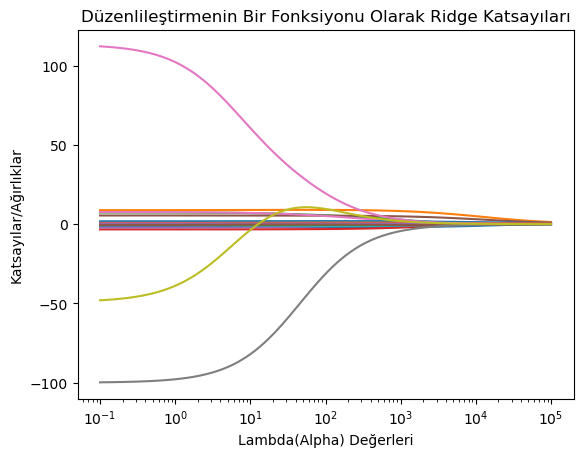

In [6]:
lambdalar = 10**np.round(np.linspace(10,-2,100)*0.5, 3)

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
# logaritmik bakış
ax.set_xscale("log")


plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar/Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları")

---------------

### Tahmin

In [7]:
y_pred = ridge_model.predict(X_test)

In [8]:
# Test Error - RMSE
print("Test RMSE Error:",mean_squared_error(y_test,y_pred, squared=False))

Test RMSE Error: 357.0239252607659


In [9]:
# Test r2_score
print("Test R2 Score:", r2_score(y_test,y_pred))

Test R2 Score: 0.41117641357955925


---------------

### Model Tunning

In [12]:
# verilen alha değerie göre, hata kareler değerini sıfıra en çok yaklaştırıan alpha değerinin bulunması 
# ve model olarak bu değerin kullanılması
# normalize = veriyi scaler ile normalleştirme uygulansın mı sorusudur

# ridge_cv adında RidgeCV sınıfı üzerinden içinde aplha değerlerini barındırabilen bir model nesnesi oluştur
ridge_cv = RidgeCV(alphas = lambdalar, scoring = "neg_mean_squared_error", normalize = True)

ridge_cv.fit(X_train,y_train)

print("alpha:",ridge_cv.alpha_)

riged_tuned = Ridge(alpha = ridge_cv.alpha_,normalize = True).fit(X_train, y_train)

mean_squared_error(y_test,riged_tuned.predict(X_test), squared = False)

alpha: 0.7046930689671469


C:\Users\hakan.saritas\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\hakan.saritas\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

386.51802649744565

In [11]:
# yukardaki işlemde ileride RidgeCV içinden normalize argümanı kalkacağı için yerine 
# aşağıdaki gibi kullanım yapılmasının gerekli olacağı vurgulanıyor 
from sklearn.pipeline import make_pipeline

ridge_cv_new = make_pipeline(StandardScaler(with_mean=False),
                            RidgeCV(alphas = lambdalar, scoring = "neg_mean_squared_error"))

# modeli X_train ve y_traine göre fit ediyoruz, kaydediyoruz
ridge_cv_new.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e+05, 8.68960429e+04, 7.56832895e+04, 6.57657837e+04,
       5.72796031e+04, 4.97737085e+04, 4.32513831e+04, 3.76703799e+04,
       3.27340695e+04, 2.85101827e+04, 2.47742206e+04, 2.15278173e+04,
       1.87499451e+04, 1.62929603e+04, 1.41905752e+04, 1.23310483e+04,
       1.07151931...
       2.47742206e+00, 2.15278173e+00, 1.87499451e+00, 1.62929603e+00,
       1.41905752e+00, 1.23310483e+00, 1.07151931e+00, 9.33254301e-01,
       8.10961058e-01, 7.04693069e-01, 6.13762005e-01, 5.33334895e-01,
       4.64515275e-01, 4.03645393e-01, 3.50751874e-01, 3.05492111e-01,
       2.65460556e-01, 2.31206479e-01, 2.00909281e-01, 1.74582215e-01,
       1.52054753e-01, 1.32129563e-01, 1.15080039e-01, 1.00000000e-01]),
                         scoring='neg_mean_squared_error'))])

In [14]:
ridge_cv_new.predict(X_test)

array([ 624.20088495,  684.129164  ,  909.48185991,  417.7361606 ,
        546.70738741,  348.12075676,  611.96800346,  432.00770271,
        890.67281585,  662.3068746 ,  643.5459695 ,  967.87240744,
        601.24366465,  506.27330079,  334.84468593,  740.39712073,
        769.58315049,  108.21527675,  850.45284583,  410.91189996,
        446.53877547,  721.51259539,  613.99670196,  493.0554482 ,
        720.69066706,  138.61009069,  851.40402584,  325.74205243,
        640.88059823,   64.53193984,  194.57787551,   16.94369162,
        377.43153281,  510.09096588,  288.47272759,  734.20045858,
       1212.98660607,  305.82630417,  112.21382459,  288.72443054,
         58.40303706,  367.90114477,  507.50505947,  507.13024422,
        942.49668334,  714.73065043,  495.95555714,  357.46180031,
        335.5645334 ,  681.11069555,  741.23097788,  369.45476482,
        651.42724488,  323.58772457,  300.59164078,  694.92286846,
        569.58806458,  766.70251607,  147.70105042, 1178.18808

In [15]:
ridge_cv_new["ridgecv"].alphas.mean()

7677.412833162885

In [16]:
mean_squared_error(y_test,ridge_cv_new.predict(X_test), squared = False)

386.5663673789541

-----------------------

In [20]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler,scale,PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.metrics import mean_squared_error, r2_score

In [21]:
hit = pd.read_csv("./dataset/hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League", "Division", "NewLeague", "Salary"], axis = 1)
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
# scale yapmadan 

model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_test,y_pred, squared=False)

356.80829057302327

In [23]:
model.coef_

array([ -1.7833362 ,   8.82281559,   7.26631498,  -3.33050119,
        -2.07091307,   5.42111154,   7.50977607,  -0.13557983,
        -0.21962511,  -0.63033482,   1.7974231 ,   0.73919181,
        -0.68443562,   0.26159973,   0.26762087,  -0.48054311,
       102.20055186, -97.88649765, -38.9216579 ])

In [24]:
# scale yaparak

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

mean_squared_error(y_test,y_pred, squared=False)

358.9753135890261

In [25]:
model.coef_

array([-213.66590499,  312.57620637,   44.9101692 ,  -36.00413765,
        -35.1764245 ,   96.902419  ,   13.89846004, -177.51358593,
         55.124277  ,   29.90685758,  316.70012219,   84.16598195,
       -118.29621312,   80.96384136,   31.47052596,  -10.13431301,
         52.07080704,  -53.04316922,  -22.66571095])

----------------------

In [26]:
# En iyi alpha değerine göre model oluşturma

ridge_cv = RidgeCV(alphas = (0.01,10, 10), scoring = "neg_mean_squared_error")

ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.01, 10.  , 10.  ]), scoring='neg_mean_squared_error')

In [27]:
# Scale yapılmamış veri 
riged_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train, y_train)

y_pred_tuned = riged_tuned.predict(X_test)

mean_squared_error(y_test, y_pred_tuned, squared = False)

356.3054852721753

In [28]:
# Scale yapılmış veri
ridge_cv.fit(X_train_scaled,y_train)

riged_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train_scaled, y_train)

y_pred_tuned = riged_tuned.predict(X_test_scaled)

mean_squared_error(y_test,y_pred_tuned, squared = False)

372.5165966006044

----------

Text(0.5, 1.0, 'Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları')

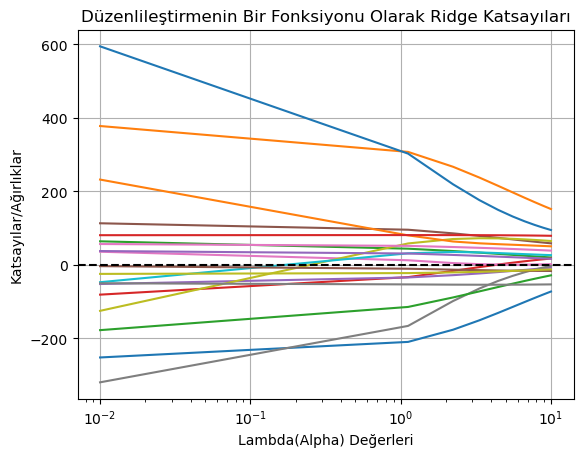

In [68]:
lambdalar = np.round(np.linspace(0.01,10,10), 3)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train_scaled,y_train)
    y_pred_tuned = model.predict(X_test_scaled)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.axhline(y=0, color='black', linestyle='--')
# logaritmik bakış
ax.set_xscale("log")
ax.grid(True)


plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar/Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları")

----------

### sklearn den veri seti yükleme

In [73]:
# load_boston - url den veri seti yükleme

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

---------

In [76]:
# sklearnden veri seti yükleme openml
from sklearn.datasets import fetch_openml

housing = fetch_openml(name="house_prices", as_frame=True)

In [81]:
type(housing)

sklearn.utils._bunch.Bunch

-----------

In [83]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [90]:
pd.DataFrame(housing.data)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [88]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [89]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

----------------

In [91]:
# load dataset
house_price = fetch_california_housing()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

In [92]:
# standardize and train/test split

X_train, X_test, y_train, y_test = train_test_split(house_price.data, house_price.target, test_size=0.3, random_state=10)

In [98]:
# scale

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
X_train_scaled.shape
y_train.shape

(14448,)

In [100]:
ridge_reg = Ridge(alpha=0)

ridge_reg.fit(X_train_scaled, y_train)

ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})

In [101]:
ridge_df 

,variable,estimate
0,MedInc,0.833295
1,HouseAge,0.122119
2,AveRooms,-0.280247
3,AveBedrms,0.336526
4,Population,0.001487
5,AveOccup,-0.028682
6,Latitude,-0.926595
7,Longitude,-0.892826


In [161]:
ridge_train_pred = []
ridge_test_pred = []
ridge_df_alpha = ridge_df.copy()

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df_alpha[var_name] = ridge_reg.coef_
    
    ridge_train_pred.append(ridge_reg.predict(X_train_scaled))
    ridge_test_pred.append(ridge_reg.predict(X_test_scaled))

In [155]:
ridge_df_alpha

,variable,estimate,estimate0,estimate1,estimate2,estimate3,estimate4,estimate5,estimate6,estimate7,...,estimate190,estimate191,estimate192,estimate193,estimate194,estimate195,estimate196,estimate197,estimate198,estimate199
0,MedInc,0.833295,0.833295,0.833248,0.833202,0.833155,0.833108,0.833061,0.833013,0.832965,...,0.821394,0.821321,0.821248,0.821175,0.821102,0.821029,0.820955,0.820882,0.820808,0.820735
1,HouseAge,0.122119,0.122119,0.122213,0.122307,0.122400,0.122494,0.122587,0.122680,0.122773,...,0.136303,0.136361,0.136419,0.136478,0.136536,0.136594,0.136651,0.136709,0.136767,0.136824
2,AveRooms,-0.280247,-0.280247,-0.280040,-0.279833,-0.279625,-0.279418,-0.279210,-0.279002,-0.278794,...,-0.240855,-0.240654,-0.240453,-0.240253,-0.240053,-0.239852,-0.239652,-0.239452,-0.239252,-0.239053
3,AveBedrms,0.336526,0.336526,0.336252,0.335977,0.335703,0.335428,0.335154,0.334880,0.334606,...,0.287214,0.286973,0.286733,0.286492,0.286252,0.286012,0.285772,0.285532,0.285292,0.285053
4,Population,0.001487,0.001487,0.001517,0.001548,0.001578,0.001608,0.001639,0.001669,0.001699,...,0.006061,0.006080,0.006099,0.006117,0.006136,0.006154,0.006173,0.006191,0.006210,0.006228
5,AveOccup,-0.028682,-0.028682,-0.028694,-0.028706,-0.028718,-0.028730,-0.028742,-0.028753,-0.028765,...,-0.030467,-0.030474,-0.030481,-0.030489,-0.030496,-0.030503,-0.030510,-0.030517,-0.030524,-0.030532
6,Latitude,-0.926595,-0.926595,-0.925667,-0.924741,-0.923817,-0.922895,-0.921975,-0.921057,-0.920142,...,-0.782049,-0.781425,-0.780803,-0.780181,-0.779561,-0.778942,-0.778324,-0.777707,-0.777091,-0.776477
7,Longitude,-0.892826,-0.892826,-0.891889,-0.890954,-0.890021,-0.889091,-0.888162,-0.887236,-0.886312,...,-0.746538,-0.745905,-0.745273,-0.744643,-0.744013,-0.743385,-0.742757,-0.742131,-0.741506,-0.740882


In [162]:
# organize dataframe

ridge_df_alpha = ridge_df_alpha.set_index("variable").T

In [165]:
ridge_df_alpha.reset_index().drop(["index"],axis = 1)

variable,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.833295,0.122119,-0.280247,0.336526,0.001487,-0.028682,-0.926595,-0.892826
1,0.833295,0.122119,-0.280247,0.336526,0.001487,-0.028682,-0.926595,-0.892826
2,0.833248,0.122213,-0.280040,0.336252,0.001517,-0.028694,-0.925667,-0.891889
3,0.833202,0.122307,-0.279833,0.335977,0.001548,-0.028706,-0.924741,-0.890954
4,0.833155,0.122400,-0.279625,0.335703,0.001578,-0.028718,-0.923817,-0.890021
...,...,...,...,...,...,...,...,...
196,0.821029,0.136594,-0.239852,0.286012,0.006154,-0.030503,-0.778942,-0.743385
197,0.820955,0.136651,-0.239652,0.285772,0.006173,-0.030510,-0.778324,-0.742757
198,0.820882,0.136709,-0.239452,0.285532,0.006191,-0.030517,-0.777707,-0.742131
199,0.820808,0.136767,-0.239252,0.285292,0.006210,-0.030524,-0.777091,-0.741506
